# Homework 6

**Before you start:** Read Chapter 10 Logistic Regression and Chapter 11 Neural Networks in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

In [1]:
# # Please remove # and run the following code if you have an error while importing the dataset
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10




## **Part 1: Logistic Regression**

### Problem 3 - Financial Condition of Banks##

The file **Banks.csv** includes data on a sample of 20 banks. 

The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values—weak or strong—according to the financial condition of the bank. 

The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets. 

The target is to classify the financial condition of a new bank using the two ratios.

Note: 1 for financially weak banks and 0 otherwise


In [148]:
# Load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [2]:
# Import the dataset
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving Banks.csv to Banks.csv
Saving insurance.csv to insurance.csv
Saving Problem1.xlsx to Problem1.xlsx
Saving SystemAdministrators.csv to SystemAdministrators.csv



**TODO 1**

Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided. 

In [3]:
df = pd.read_csv("Banks.csv") 
df.head()

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [22]:
X = df.drop(["Financial Condition", "TotCap/Assets", "Obs"], axis = 1)
y = df["Financial Condition"]
X.shape, y.shape

((20, 2), (20,))

In [17]:
clf = LogisticRegression().fit(X, y)
clf.score(X, y)

0.75


**TODO 2**

Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

a. The logit as a function of the predictors

b. The odds as a function of the predictors

c. The probability as a function of the predictors


In [20]:
print("Log Odds: ",clf.coef_[0])
print("Odds: ",np.exp(clf.coef_[0]))
print("Intercept: ", clf.intercept_[0])

Log Odds:  [0.16075579 0.72642506]
Odds:  [1.17439814 2.06767557]
Intercept:  -0.4733365221513398


In [28]:
def logit(y_test, coef, intercept):
  return np.dot(y_test, coef) + intercept
def odds(y_test, coef, intercept):
  return np.exp(np.dot(y_test, coef) + intercept)
def prob(y_test, coef, intercept):
  return np.exp(np.dot(y_test, coef) + intercept)/(1 + np.exp(np.dot(y_test, coef) + intercept))

a. Logit = -0.4733365221513398 + 0.16075579 x TotExp/Assets	+ 0.72642506 x TotLns&Lses/Assets

b. Odds  = exp(-0.4733365221513398 + 0.16075579 x TotExp/Assets	+ 0.72642506 x TotLns&Lses/Assets)

c. p = 1/(1 + exp(0.4733365221513398 - 0.16075579 x TotExp/Assets	- 0.72642506 x TotLns&Lses/Assets))


**TODO 3**

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. 

From your logistic regression model, estimate the following four quantities for this bank: 

the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

In [29]:
y_test = np.array([0.11, 0.6])
print("Logit: ", logit(y_test,clf.coef_[0], clf.intercept_[0]))
print("Odds: ", odds(y_test,clf.coef_[0], clf.intercept_[0]))
print("probability of being financially weak: ", prob(y_test,clf.coef_[0], clf.intercept_[0]))

Logit:  -0.019798345919363358
Odds:  0.9803963542999818
probability of being financially weak:  0.4950505751897964


As below cutoff value of 0.5 it is financly strong

**TODO 4**

We use a cutoff value of 0.5 to classify a record based on propensity. 

Instead, if we want to classify the record using the odds or logit, what value should we take as a cutoff?

In [36]:
def plot_fig(x,y, y_label):
  graph = sns.lineplot(x=x, y=y)
  graph.axvline(0.5, color='r')
  plt.xlabel("Propensity")
  plt.ylabel(y_label)
  plt.title("Propensity vs " + y_label)
  plt.show()

In [38]:
propensity = []
odds = []
logit = []
for p in np.arange(0.01,1,0.01):
  propensity.append(p)
  odds.append(p/(1-p))
  logit.append(np.log(p/(1-p)))

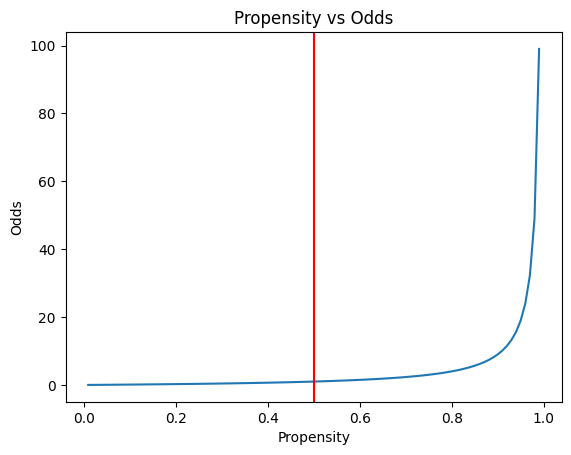

In [39]:
plot_fig(propensity, odds, y_label = "Odds")

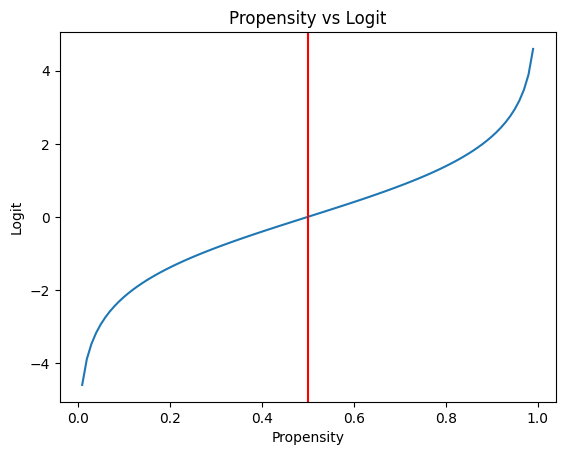

In [40]:
plot_fig(propensity, logit, y_label = "Logit")

- If we go by odds from graph we can observe that morethan 1 value as class of interest and less than 1 as alternate class
- Similarly from graph positive value as class of interest and less than 0 as alternate class for logit

**TODO 5**

When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak. 

To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

- By decreasing the probability threshold or cutoff value for classification, we can classify more banks as financially weak, which reduces the chances of misclassifying a weak bank as strong. However, this will increase the chances of misclassifying a strong bank as weak.

### Problem 4 - Identifying Good System Administrators##

A management consultant is studying the roles played by experience and training in a system administrator’s ability to complete a set of tasks in a specified amount of time. In particular, the consultant is interested in discriminating between administrators who are able to complete given tasks within a specified time and those who are not. 

Data are collected on the performance of 75 randomly selected administrators. They are stored in the file **SystemAdministrators.csv**.

The variable Experience measures months of full-time system administrator experience, while Training measures the number of relevant training credits. The outcome variable Completed is either Yes or No, according to whether or not the administrator completed the tasks.


In [42]:
# Import the dataset
df1 = pd.read_csv("SystemAdministrators.csv") 
df1

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes
...,...,...,...
70,5.6,4,No
71,5.9,8,No
72,6.4,6,No
73,3.8,4,No


In [55]:
df1["Completed task"].value_counts()

No     60
Yes    15
Name: Completed task, dtype: int64


**TODO 1**

Create a scatter plot of Experience vs. Training using color or symbol to distinguish the administrators' task completion statues. 

Which predictor(s) appear(s) potentially useful for the classifying task?

Text(0.5, 1.0, 'Experience vs. Training')

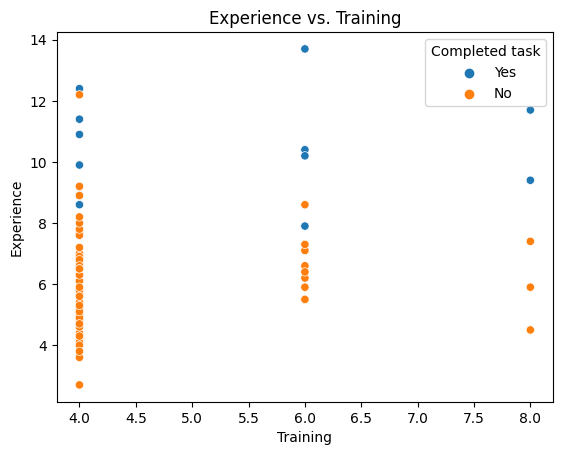

In [46]:
sns.scatterplot(data=df1, x="Training", y="Experience", hue="Completed task")
plt.title("Experience vs. Training")

From the graph we can see that if we draw a horizontal line at around 8 years of experience we can almost split the status of completion of task.

So i would pick Experience as a predictor 

**TODO 2**

Run a logistic regression model with both predictors using the entire dataset as training data. Among those who completed the task, what is the percentage of administrators incorrectly classified as failing to complete the task?

In [47]:
X = df1.drop(["Completed task"], axis = 1)
y = df1["Completed task"]
X.shape, y.shape

((75, 2), (75,))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94        60
         Yes       0.83      0.67      0.74        15

    accuracy                           0.91        75
   macro avg       0.88      0.82      0.84        75
weighted avg       0.90      0.91      0.90        75
 



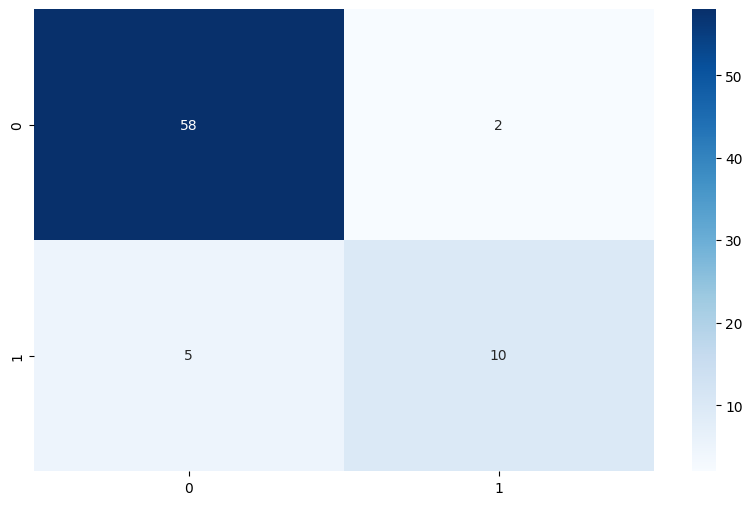

In [50]:
clf1 = LogisticRegression().fit(X, y)
y_pred = clf1.predict(X)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
print(classification_report(y, y_pred), '\n')

From the above image

- Among those who completed the task, what is the percentage of administrators incorrectly classified as failing to complete the task?
- Percentage = 5/15 => 33.33%

**TODO 3**

To decrease the percentage in TODO 2, should we increase or decrease the cutoff probability?

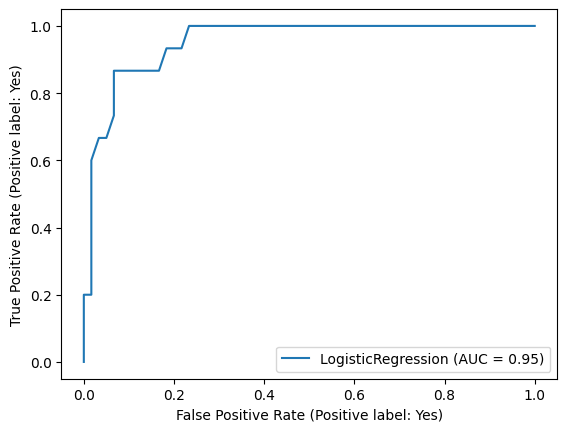

In [56]:
RocCurveDisplay.from_estimator(estimator = clf1, X = X, y = y)

The percentage we calculated is FPR and along x-axis Cutoff decreases when FPR goes from 0 to 1.

- So to decrease the percentage 0.33 we are coming towards zero which implies cutoff increases towards 1.
- => Increase cutoff

**TODO 4**

How much experience must be accumulated by a administrator with 4 years of training before his or her estimated probability of completing the task exceeds 0.5?

In [57]:
clf1.coef_[0], clf1.intercept_[0]

(array([1.04592814, 0.1640162 ]), -10.245229250673233)

The activation function in logistic function is sigmoid function and for the probability to cross more than 0.5 implies the Z > 0

- => -10.245229250673233 + 1.04592814 x Experience + 0.1640162 x Training > 0
- Implies Experience > 9.168091080017 months



## **Part 2: Decision Trees**

### Problem 5 - Wine Data ##

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and a decision tree classifier.

In [113]:
from sklearn import datasets
import pandas as pd

# load the wine dataset 
wine = datasets.load_wine()
print(wine.DESCR)

# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**TODO 1**

Partition the data into 70% training and 30% validation set.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91, 13), (39, 13), (91,), (39,))

**TODO 2**

Fit a decision tree classifier on the training set with no pruning.

Plot the tree with the following requirements:


*   The node with splitting rule should contain variable name instead of variable index.
*   Pick the appropriate information to present in the node. The node should be of appropriate size so the information is clear for viewing.
*   The node should be colored.



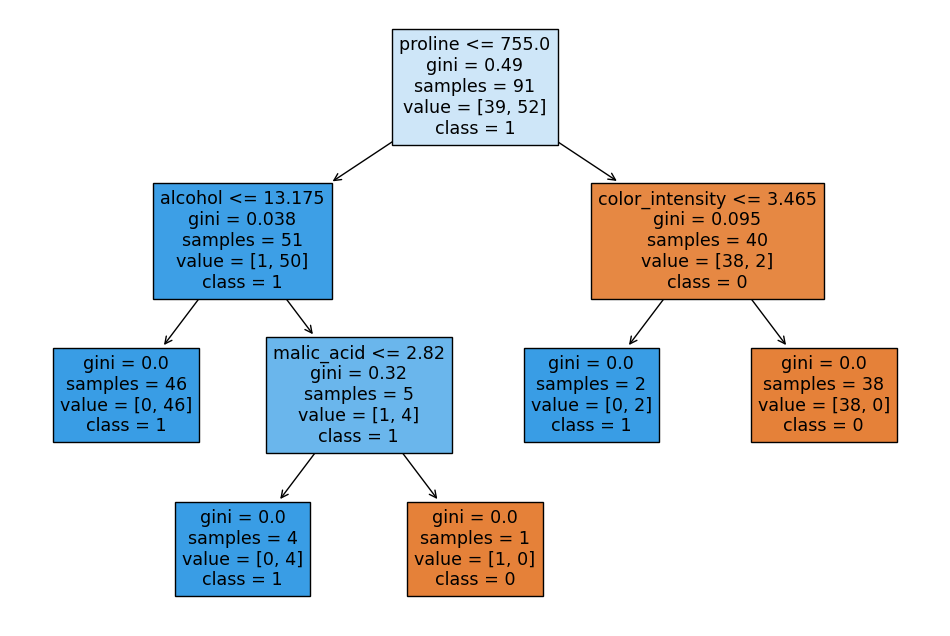

In [122]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
plt.figure(figsize=(12,8))
fig = tree.plot_tree(clf2, feature_names= X_train.columns, class_names = np.unique(y_train).astype(str), filled=True)

**Hint:** [Decision tree classifier with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**TODO 3**

Prune the tree with cost complexity. What is the best ccp value? Use visualization to back up your decision. 

Plot the pruned tree in the same manner as TODO 2.

In [119]:
path = clf2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Fit decision trees with different ccp values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

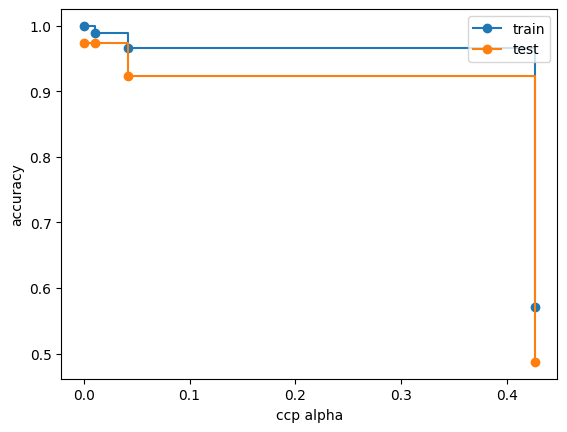

In [120]:
# Determine accuracy scores for different ccp values
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
# Plot accuracy scores vs ccp values
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel("ccp alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

best_ccp_alpha = 0.0 



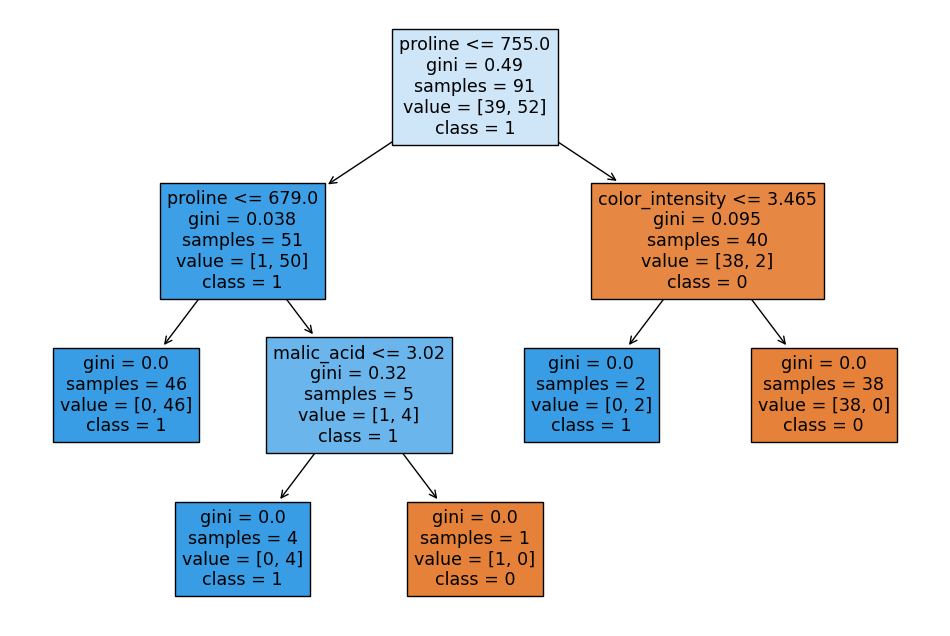

In [124]:
# Select best ccp value
best_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print("best_ccp_alpha =",best_ccp_alpha,"\n")
# Fit decision tree with best ccp value
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
pruned_tree.fit(X_train, y_train)

# Plot pruned tree
plt.figure(figsize=(12,8))
fig = tree.plot_tree(pruned_tree, feature_names= X_train.columns, class_names = np.unique(y_train).astype(str), filled=True)
plt.show()

**Hint:** [Minimal cost complexity pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

[Post pruning decision trees with cost complexity with sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

## **Part 3: Neural Network**

### Problem 6 - Insurance amount prediction##

Consider the insurance data (insurance.csv). The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and "**charge**" as a target feature. We will predict individual medical costs billed by health insurance.

In [100]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
# Import the dataset
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

**Todo 1:**

1. Load the insurance csv into a dataframe. 
2. preprocess and clean the data by checking for null values.
3. Concert all the categorical variables to numerical and perform one-hot encoding.



In [125]:
# Import the dataset
df2 = pd.read_csv("insurance.csv") 
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [126]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [132]:
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['sex','smoker','region']
encoded_array = enc.fit_transform(df2.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
df_sklearn_encoded = pd.concat([df2,df_encoded],axis=1)
df_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df_sklearn_encoded

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Todo 2:** 

Separate the X and y for predictors and target variable and create a train test split of ratio 80, 20.

Note: TARGET_NAME = 'charges'

In [140]:
X = df_sklearn_encoded.drop(["charges"],axis=1)
y = df_sklearn_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

**Todo 3:**

1. build a neural network model with 2 layers. 

  Layer 1: first layer should contian 10 nodes. You are free to choose any activation function for the first layer.

  Layer 2: Use your intuition to decide on the number of nodes and activation function that can be used for layer 2. (You can research about the output layer regression models for neural networks) 


2. Train the model for 2000 iterations.


Let this be model1

Ref: https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/

In [141]:
# create scaler object to scale data
standard_scaler  = StandardScaler()

# scale the training data
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Define model1
model1 = Sequential()
model1.add(Dense(10, input_dim=X_train.shape[1], activation='relu')) # Layer 1 with 10 nodes and ReLU activation
model1.add(Dense(1, activation='linear')) # Layer 2 with 1 node and linear activation (output layer)
# Compile model1
model1.compile(loss='mean_squared_error', optimizer='adam')
# Train model1
history1 = model1.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/2000
27/27 [==============================] - 1s 11ms/step - loss: 325109248.0000 - val_loss: 309968096.0000
Epoch 2/2000
27/27 [==============================] - 0s 4ms/step - loss: 324994528.0000 - val_loss: 309862144.0000
Epoch 3/2000
27/27 [==============================] - 0s 3ms/step - loss: 324883968.0000 - val_loss: 309759744.0000
Epoch 4/2000
27/27 [==============================] - 0s 4ms/step - loss: 324774720.0000 - val_loss: 309654592.0000
Epoch 5/2000
27/27 [==============================] - 0s 4ms/step - loss: 324660032.0000 - val_loss: 309541760.0000
Epoch 6/2000
27/27 [==============================] - 0s 3ms/step - loss: 324536480.0000 - val_loss: 309420352.0000
Epoch 7/2000
27/27 [==============================] - 0s 4ms/step - loss: 324403808.0000 - val_loss: 309288160.0000
Epoch 8/2000
27/27 [==============================] - 0s 4ms/step - loss: 324259264.0000 - val_loss: 309146624.0000
Epoch 9/2000
27/27 [==============================] - 0s 3ms/step - los

**Todo 4:**

Plot the training and validation loss for model1.

In [144]:
def plot_history(history_data, key):
  plt.plot(history_data.history[key])
  plt.plot(history_data.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

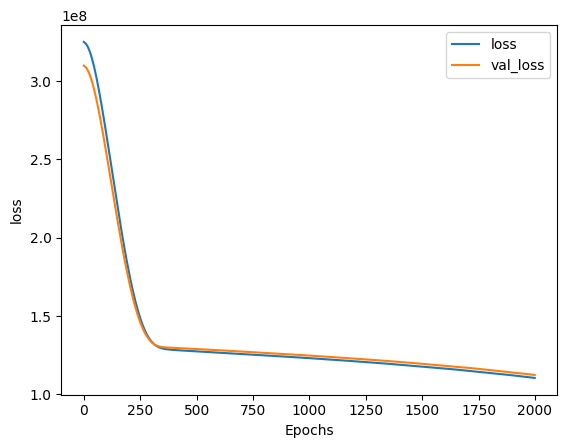

In [146]:
# Plot the history
plot_history(history1, 'loss')

**Todo 5:**

build a deep neural network model with 4 layers.

Layer 1: first layer should contian 50 nodes. You are free to choose any activation function for the first layer.

Layer 2: first layer should contian 30 nodes. You are free to choose any activation function for the first layer.

Layer 3: first layer should contian 20 nodes. You are free to choose any activation function for the first layer.

Layer 4: Use your intuition to decide on the number of nodes and activation function that can be used for layer . (You can research about the output layer regression models for neural networks)

Train the model for 5000 iterations.

Let this be model2

In [147]:
# create model2
model2 = Sequential()
model2.add(Dense(50, input_dim=X_train.shape[1], activation='relu')) # layer1
model2.add(Dense(30, activation='relu')) # layer 2
model2.add(Dense(20, activation='relu')) # layer 3
model2.add(Dense(1)) # layer 4
# compile model2
model2.compile(loss='mean_squared_error', optimizer='adam')
# train model2
history2 = model2.fit(X_train, y_train, epochs=5000, batch_size=64, validation_split=0.2, verbose=0)

**Todo 6:**

Plot the training and validation loss for model2.

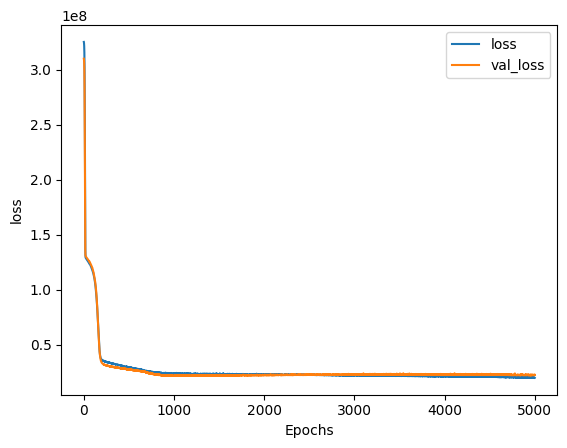

In [149]:
plot_history(history2, 'loss')

**Todo 7:**
Comparing model 1 and 2.

1. predict the charges for test data using model 1 and 2.

2. using mse as performance evaluation metrics, comment of model performance for the test data.

3. Compare the performance of model 1 and 2.

What do you understand from the models built.

In [150]:
def predict_info(model, X_test, y_test):
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  return y_pred, mse

In [151]:
# Predicting charges for test data using model 1
y_pred1, mse1 = predict_info(model1, X_test, y_test)
print("MSE for model 1:", mse1)

9/9 [==============================] - 0s 2ms/step
MSE for model 1: 114180829.59666839


In [152]:
# Predicting charges for test data using model 2
y_pred2, mse2 = predict_info(model2, X_test, y_test)
print("MSE for model 2:", mse2)

9/9 [==============================] - 0s 4ms/step
MSE for model 2: 20931023.799519982


In [153]:
mse1>mse2

True

- From the MSE we can say that model2 performance is good than model1
- It is obvious that as we increased no of iterations and layers the predictive ability of a neural network improves. But a con is it also increases training resourses consumed.

**Todo 8: **

convert the target variable into categorical by using median as cutoff. 

Use the created variable as the new target variable and drop charges column from your predictors.

In [156]:
data_masked = df_sklearn_encoded.copy()
median = data_masked['charges'].median()
data_masked['charges'] = np.where(data_masked['charges'] <= median, 0, 1)
data_masked

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Todo 9:**

Seperate the X and y for predictors and target variable and create a train test split of ratio 80, 20.


In [157]:
X = data_masked.drop(["charges"],axis=1)
y = data_masked["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

**Todo 10:**

Build a neural network model with 3 layers.

Layer 1: first layer should contian 20 nodes. You are free to choose any activation function for the first layer.

Layer 2: first layer should contian 10 nodes. You are free to choose any activation function for the first layer.

Layer 3: Use your intuition to decide on the number of nodes and activation function that can be used for layer 3. (You can research about the output layer classification models for neural networks)

Train the model for 2000 iterations. Use binary_crossentropy for loss function.

Let this be model3

Ref: https://www.analyticsvidhya.com/blog/2021/11/neural-network-for-classification-with-tensorflow/

In [158]:
# Define the model
model3 = Sequential()
model3.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu')) # layer 1
model3.add(Dense(10, activation='relu')) # layer 2
model3.add(Dense(1, activation='sigmoid')) # layer 3
# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history3 = model3.fit(X_train, y_train, epochs=2000, validation_split=0.2, verbose=0)

**Todo 11:** Plot the training and validation loss for model 3 with iterations.

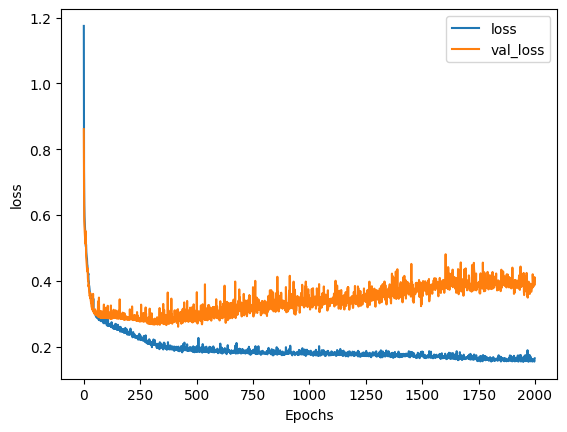

In [159]:
plot_history(history3, 'loss')

****Todo 12: ****

predict the values for test data and build the confusion matrix.

Comment on model performance.

9/9 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       146
           1       0.93      0.93      0.93       122

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268
 



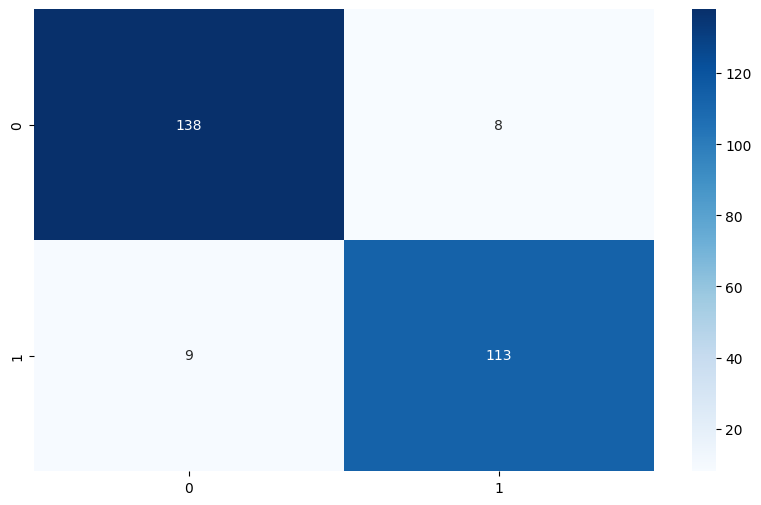

In [164]:
y_pred = model3.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
print(classification_report(y_test, y_pred), '\n')

 Overall, the model seems to be performing very well with high values of accuracy, precision, recall, and f1-score for both classes. Specifically, the model has an accuracy of 0.946, which means that it correctly predicts the class labels for 94.6% of the samples in the dataset. The precision, recall, and f1-score are all high, which indicates that the model is making few false positives and false negatives.